<a href="https://colab.research.google.com/github/quentalt/stenographie/blob/main/stenography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import types
from google.colab.patches import cv2_imshow

In [ ]:
def messageToBinary(message):
  if type(message) == str:
    return ''.join([format(ord(i),"08b") for i in message])
  elif type(message) == bytes or type(message) == np.ndarray:
      return [ format(i,"08b") for i in message]
  elif type(message) == int or type(message) == np.uint8:
      return format(message,"08b")
  else:
      raise TypeError("Input is failed")


In [ ]:
def hideData(image,secret_message):
  n_bytes = image.shape[0] * image.shape[1] * 3 // 8
  print("maximum bytes to encode:  ", n_bytes)

  if len(secret_message) > n_bytes:
    raise ValueError("Error encouretered");
  secret_message += "#####"

  data_index = 0

  binary_secret_msg = messageToBinary(secret_message)

  data_len= len(binary_secret_msg)
  
  for values in image:
    for pixel in values:
      r,g,b = messageToBinary(pixel)

      if data_index < data_len:

        pixel[0] = int(r[:-1]+ binary_secret_msg[data_index],2)
        data_index +=1

      if data_index < data_len:

        pixel[1] = int(g[:-1]+ binary_secret_msg[data_index],2)
        data_index +=1

      if data_index < data_len:

        pixel[2] = int(b[:-1]+ binary_secret_msg[data_index],2)
        data_index +=1

      if data_index >= data_len:
        break
  return image

In [ ]:
def showData(image):
  binary_data = ""
  for values in image:
    for pixel in values:
      r,g,b = messageToBinary(pixel)
      binary_data += r[-1]
      binary_data += g[-1]
      binary_data += b[-1]
    all_bytes = [binary_data[i: i+8] for i in range(0,len(binary_data),8)]

    decoded_data = ""

  for byte in all_bytes:
      decoded_data += chr(int(byte,2))
      if decoded_data[-5:] == "#####":
          break
  return decoded_data[:-5]
  

In [ ]:
def encode_text():
    image_name = input("Enter image name:   ")
    image = cv2.imread(image_name)
    print("la forme de l'image est :   ",image.shape)
    print("l'image original est en dessous:   ")
    resized_image = cv2.resize(image,(500,500))
    cv2_imshow(resized_image)

    data = input("Entre la data encode :   ")
    if (len(data)==0):
      raise ValueError('Data est vide')

    filename = input("Entrer le nom du nouvel encodage (avec extension) ")
    encoded_image = hideData(image,data)
    cv2.imwrite(filename,encoded_image)
  

In [ ]:
def decode_text():
    image_name = input("Entrer le nom de l image stenographié que tu veux décodé (avec extension): ")
    image = cv2.imread(image_name)

    print("L'image stenographier est vu en dessous: ")

    resized_image = cv2.resize(image,(500,500))
    cv2_imshow(resized_image)

    text = showData(image)
    return text

In [ ]:
def Steganography(): 
    a = input("Image Steganography \n 1. Encode the data \n 2. Decode the data \n Your input is: ")
    userinput = int(a)
    if (userinput == 1):
      print("\nEncoding....")
      encode_text() 
          
    elif (userinput == 2):
      print("\nDecoding....") 
      print("Decoded message is " + decode_text()) 
    else:
      raise Exception("Enter correct input") 

Image Steganography 
 1. Encode the data 
 2. Decode the data 
 Your input is: 2

Decoding....
Entrer le nom de l image stenographié que tu veux décodé (avec extension): ponk_encoded.png
L'image stenographier est vu en dessous: 


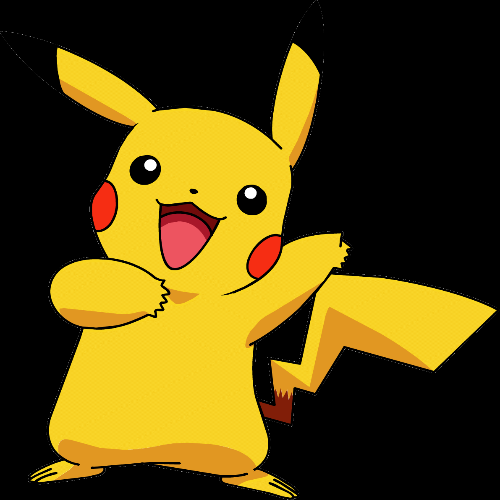

Decoded message is george


In [ ]:
Steganography()